1\. Write a function that converts number representation (bin<->dec<->hex)

In [27]:
def dec_to_bin(x):
    str_res = ""
    while (x!=0):
        res = str(x%2)
        str_res += res
        x = x//2
    return str_res[::-1]

def bin_to_dec(x):
    x = x[::-1]
    res = 0
    for i in range(len(x)):
         res += int(x[i])*2**i
    return res

hex_dict={0:"0", 1:"1", 2:"2", 3:"3", 4:"4", 5:"5", 6:"6", 7:"7", 8:"8", 9:"9",10:"a", 11:"b", 12:"c", 13:"c", 14:"d", 15:"e"}

def dec_to_hex(x):
    str_res = ""
    while (x!=0):
        res = x%16
        str_res += str(hex_dict[res])
        x = x//16
    return str_res[::-1]

rev_hex_dict = {value:key for (key,value) in hex_dict.items()}

def hex_to_dec(x):
    x = x[::-1]
    res = 0
    for i in range(len(x)):
         res += rev_hex_dict[x[i]]*16**i
    return res

def bin_to_hex(x):
    return dec_to_hex(bin_to_dec(x))

def hex_to_bin(x):
    return dec_to_bin(hex_to_dec(x))

print(dec_to_bin(130))
print(bin_to_dec("10000010"))
print(dec_to_hex(130))
print(hex_to_dec("82"))
print(bin_to_hex("10000010"))
print(hex_to_bin("82"))

10000010
130
82
130
82
10000010


2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [39]:
float32 ="00111110001000000000000000000000"

sign = int(float32[0])
exponent = float32[1:9]
mantissa = float32[9:]

decimal_part = 1
for i in range(1,24):
    decimal_part += int(mantissa[i-1])*2**(-i)
    
result = (-1)**(sign)*2**(bin_to_dec(exponent)-127)*decimal_part
print( "single precision: ", float32, "converted: ", result)

single precision:  00111110001000000000000000000000 converted:  0.15625


3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [164]:
previousprevious = 0
previous = 0
current  = 1. 

while(current > previous):
    previousprevious = previous
    previous = current
    current *= 2

print("Overflow limit: ", previousprevious)    

Overflow limit:  8.98846567431158e+307


In [163]:
previousprevious = 0
previous = 2
current  = 1.

while(current < previous):
    previousprevious = previous
    previous = current
    current /= 2

print("Underflow limit: ", previousprevious)    

Underflow limit:  5e-324


4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [160]:
previous = 0
current  = 1
add = 3

while( current != previous ):
    previous = current
    add /= 2
    current += add
    
print("The machine precision is of: ", 10**(np.floor(np.log10(add))))

The machine precision is of:  1e-16


5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [123]:
import numpy as np
def rootFinder(a, b, c):
    x1 = (-b+np.sqrt(b**2-4*a*c))/(2*a)
    x2 = (-b-np.sqrt(b**2-4*a*c))/(2*a)
    return x1, x2

def rootFinder1(a, b, c):
    x1 = 2*c/(-b-np.sqrt(b**2-4*a*c))
    x2 = 2*c/(-b+np.sqrt(b**2-4*a*c))
    return x1, x2

def rootFinder2(a, b, c):
    x1 = 2*c/(-b-np.sqrt(b**2-4*a*c))
    x2 = (-b-np.sqrt(b**2-4*a*c))/(2*a)
    return x1, x2

def compPol(a, b, c, x):
    return a*x**2+b*x+c

a,b,c = 0.001, 1000, 0.001
x1, x2 = rootFinder(0.001, 1000, 0.001)
print("First case")
print("x1 = ", x1,"x2 = ", x2, "\n ax1^2+bx1+c=", compPol(a, b, c, x1), "\n ax2^2+bx2+c=", compPol(a, b, c, x2) )

print("\n Second case")
x1, x2 = rootFinder1(0.001, 1000, 0.001)
print("x1 = ", x1,"x2 = ", x2, "\n ax1^2+bx1+c=", compPol(a, b, c, x1), "\n ax2^2+bx2+c=", compPol(a, b, c, x2) )

print("\n Optimal case")
x1, x2 = rootFinder2(0.001, 1000, 0.001)
print("x1 = ", x1,"x2 = ", x2, "\n ax1^2+bx1+c=", compPol(a, b, c, x1), "\n ax2^2+bx2+c=", compPol(a, b, c, x2) )

First case
x1 =  -9.999894245993346e-07 x2 =  -999999.999999 
 ax1^2+bx1+c= 1.0575401665491313e-08 
 ax2^2+bx2+c= 7.247924804689582e-08

 Second case
x1 =  -1.000000000001e-06 x2 =  -1000010.5755125057 
 ax1^2+bx1+c= 0.0 
 ax2^2+bx2+c= 10575.62534720993

 Optimal case
x1 =  -1.000000000001e-06 x2 =  -999999.999999 
 ax1^2+bx1+c= 0.0 
 ax2^2+bx2+c= 7.247924804689582e-08


b) In the second case x1 is computed exactly, instead x2 is clearly worst than the result obtained in the first case. This is due to the fact that, using the formulas $x_1 =\frac{-b+\sqrt{b^2-4ac}}{2a}$ in the first case and $x_2 =\frac{2c}{-b+\sqrt{b^2-4ac}}$, we are getting into roundoff errors. ( Just take the limit for b >> a,c ). 

The optimal solution use the First case formula for x2 and the second case formula for x1, avoiding roundoff errors.

6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

0.01 1.010000000000001 1
0.0001 1.0000999999998899 1
1e-06 1.0000009999177333 1
1e-08 1.0000000039225287 1
1e-10 1.000000082840371 1
1e-12 1.0000889005833413 1
1e-14 0.9992007221626509 1


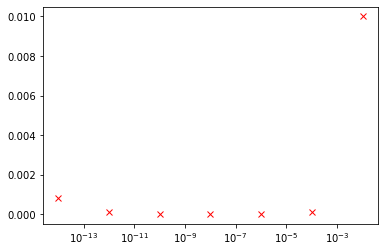

In [122]:
delta = 10**-2

def f(x):
    return x*(x-1)

def df(x):
    return 2*x-1

trueDer = []
anDer   = []
deltas  = []
for i in range(7):
    x = 1
    derivative = (f(x+delta)-f(x))/delta
    print(delta, derivative, df(x))
    trueDer.append(df(x))
    anDer.append(derivative)
    deltas.append(delta)
    delta /= 10**2
    
from matplotlib import pyplot as plt
plt.xscale('log')
plt.plot(deltas, abs(np.array(anDer)-np.array(trueDer)), "rx")

It's evident that the two derivatives will not agree perfectly due to the discretization of $\delta$, the intersting fact is that we will expect an increasing accuracy for smaller $\delta$ but that's not what we observe. In fact, as $\delta$ becomes smaller, the function $\frac{f(x+\delta)-f(x)}{\delta}$ becomes poorly conditioned, i.e. big variations in output for small input variation.

7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


In [134]:
def f(x):
    return np.sqrt(abs(1-x**2))

def RiemannInt(N, h, x_i):
    sum_ = 0
    x = x_i
    for n in range(1, N+1):
        sum_ += h*f(x)
        x += h
    return sum_
 
N = 100
h = 2/N
x_i = -1

sum_ = RiemannInt(N, h, x_i)
print("Riemann integral: ", sum_, "| Accuracy: ", abs(sum_-np.pi/2)/(np.pi/2)*100, "%")

Riemann integral:  1.5691342555492493 | Accuracy:  0.10581074180626304 %


In [149]:
%timeit RiemannInt(N, h, x_i)
%timeit RiemannInt(N**2, h, x_i)
%timeit RiemannInt(N**3, h, x_i)
%timeit RiemannInt(N**3*2, h, x_i)

76.8 µs ± 1.65 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
7.42 ms ± 102 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
793 ms ± 20.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.55 s ± 24.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


max N predicted for computational time under 1s: [1283368.93153354]
max N predicted for computational time under 60s: [77233005.0655619]


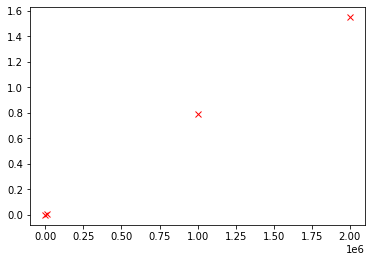

In [150]:
from sklearn.linear_model import LinearRegression

x = [N, N**2, N**3, N**3*2]
y = [76.8*10**(-6), 7.42*10**(-3), 793*10**(-3), 1.55 ]
x = np.array(x)
y = np.array(y).reshape(-1, 1)
plt.plot(x,y, "rx")

reg = LinearRegression().fit(y,x)
timeMax = [1]
timeMax = np.array(timeMax)
print("max N predicted for computational time under 1s:", reg.predict(timeMax.reshape(1,-1)))

timeMax = [60]
timeMax = np.array(timeMax)
print("max N predicted for computational time under 60s:", reg.predict(timeMax.reshape(1,-1)))

In [157]:
N = int(reg.predict(timeMax.reshape(1,-1)))
sum_ = RiemannInt(N, 2/N, x_i)
print("Riemann integral for max N under 1 minute of ex time: ", sum_, "| Accuracy: ", abs(sum_-np.pi/2)/(np.pi/2)*100, "%")

Riemann integral for max N under 1 minute of ex time:  1.5707963260206126 | Accuracy:  4.929244849030035e-08 %


We calculated the maxNs through a linear regression, the gain in running the algorithm for 1 minute respect to $\simeq 10^{-5} \, s$ is of 7 order in accuracy.